# About Feature Scaling
Scaling guarantees that all features are on a compatible scale and ranges (but still maintain the same data distribution, correlation and covariance). It is important, because magnitude of the features affects the results. Larger scale features may dominate over smaller scale ones and outcome may be distorted. By scaling we can avoid this problem and make sure that each feature contributes equally to the learning process. It can help improve convergence speed and performance of some optimization algorithms as well. 

We have to remember that while Feature Scaling is often crucial, it is often not even needed when many ML algorithms are unaffected by scale. So we should consider whether Feature Scaling is always necessary when dataset's features have a diverse range. And if it is advisable, which scaler should we use.



Feature Scaling can be broadly classified into two categories:
- Standardization
- Normalization

**Standardization** transforms the features to have a mean of 0 and a standard deviation of 1. Preferable when data is normally distributed. Keeps the shape of distribution and does not bound features to specific range.

**Normalization** (also known as min-max scaling) transforms the features to a range between 0 and 1, while maintaining the relative relationships between features values and it's mostly used when the distribution of the data is not Gaussian or unknown.

In [54]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from feature_scaler import *

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('./data/breast-cancer.csv')
y = df['diagnosis']
X = df.drop(columns=["id", "diagnosis"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = standard_scaler(X_train, X_test) # Standard Scaler

Output below shows data distribution, and as we can see shows a general Gaussian distribution, that's why we use Standard Scaling.

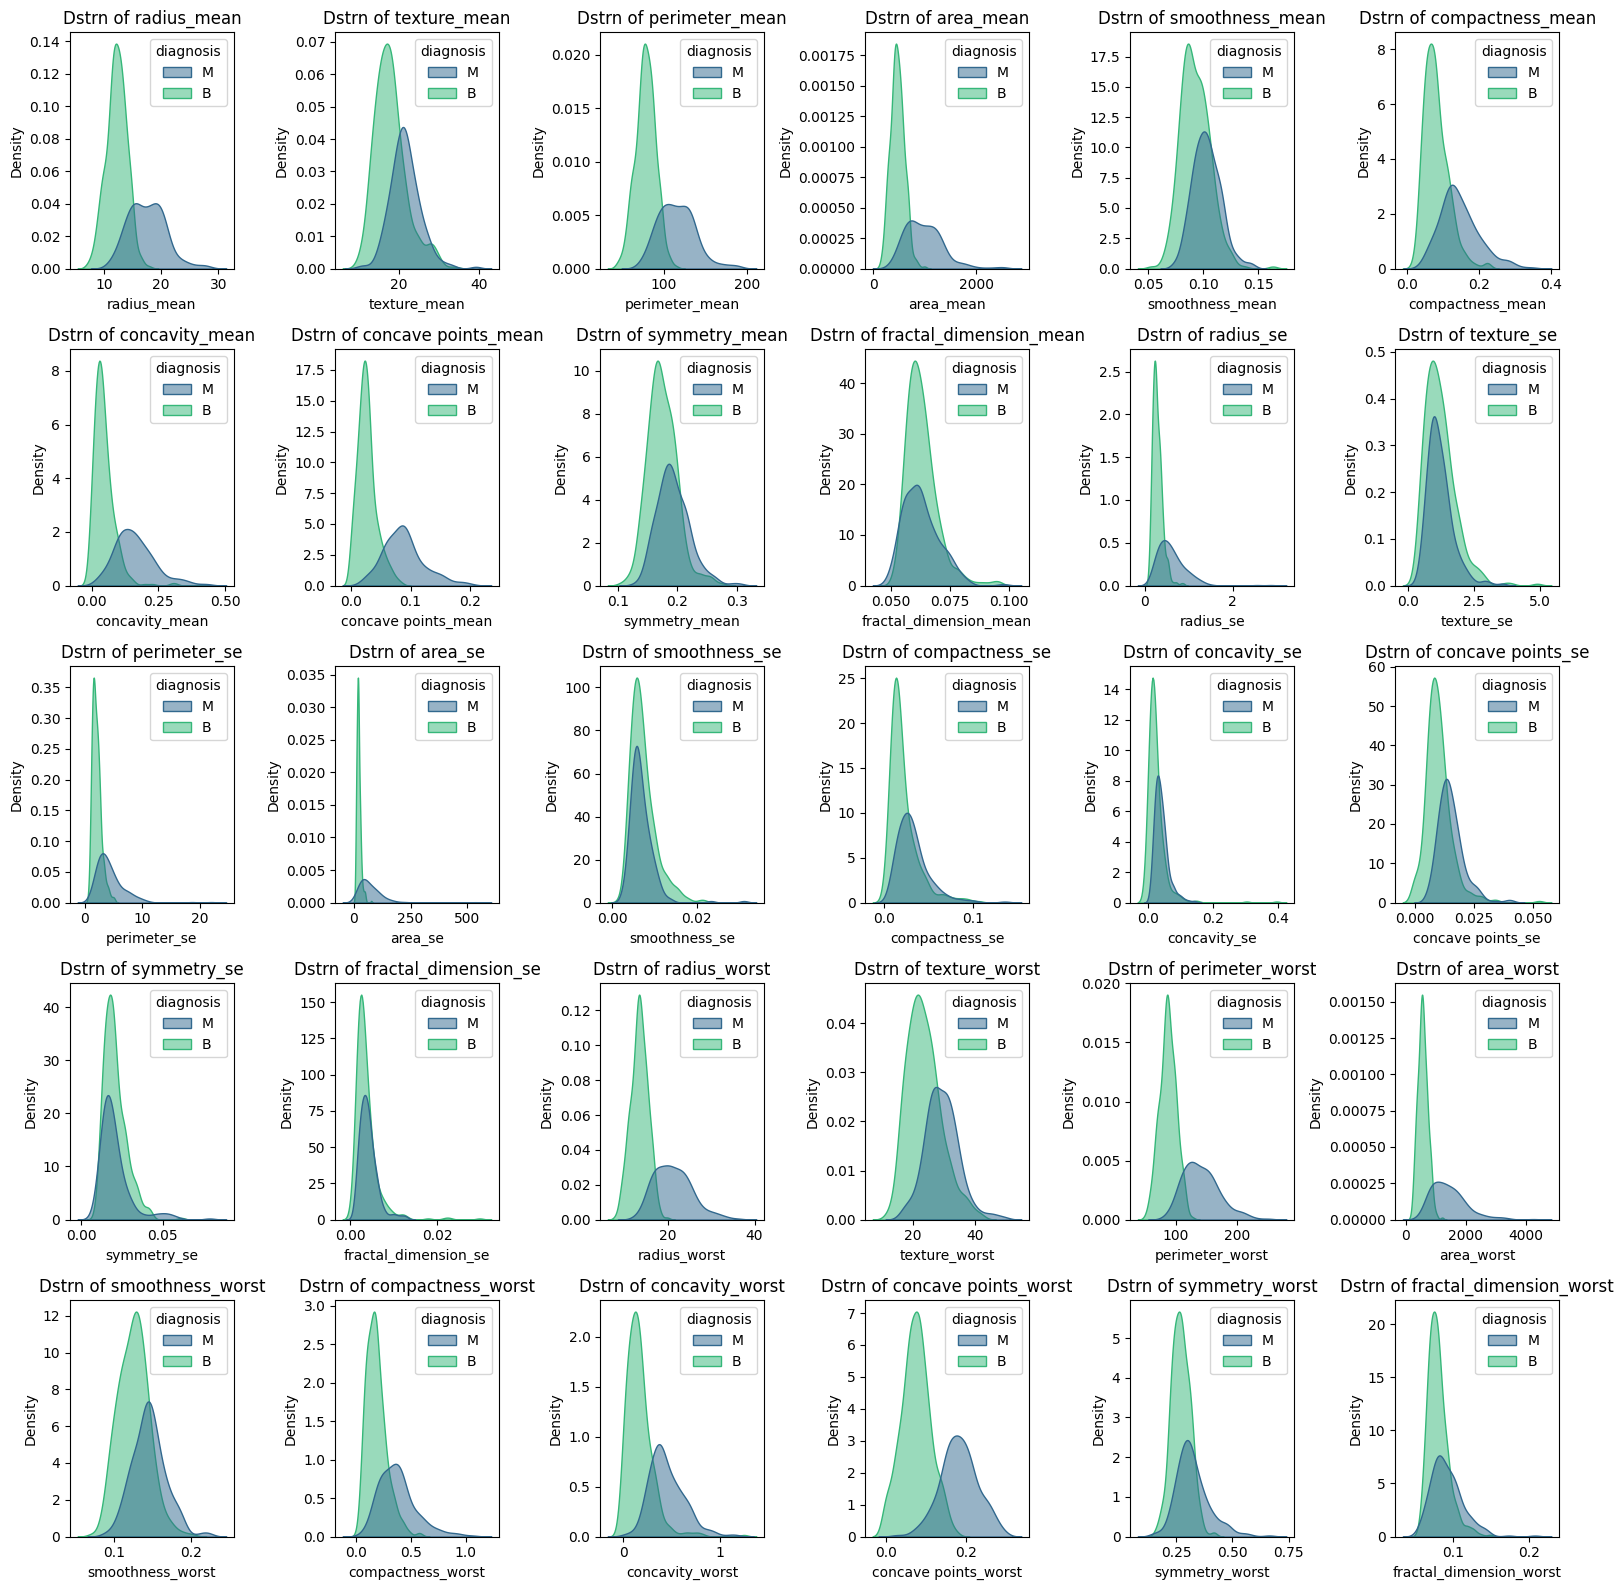

In [95]:
plt.figure(figsize=(16, 16))

for i, column in enumerate(df.columns[2:]):
    plt.subplot(5, 6, i+1)  # Subplot indexing starts from 1
    sns.kdeplot(data=df, x=df[column], fill=True, hue='diagnosis', palette='viridis', alpha=0.5)
    plt.title(f"Dstrn of {column}") # Distribution of the column

plt.tight_layout()
plt.show()

## k-Nearest Neighbors (kNN)

In [56]:
# Without Feature Scaling
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# With Feature Scaling
knn_classifier_scaled = KNeighborsClassifier(n_neighbors=3)
knn_classifier_scaled.fit(X_train_scaled, y_train)
y_pred = knn_classifier_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred)

data = [accuracy.round(3), accuracy_scaled.round(3), 'YES' if accuracy < accuracy_scaled else 'NO']

## Logistic Regression

In [57]:
# Without Feature Scaling
lr_classifier = LogisticRegression(n_jobs=-1, random_state=42, max_iter=1000)
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# With Feature Scaling
lr_classifier_scaled = LogisticRegression(n_jobs=-1, random_state=42, max_iter=1000)
lr_classifier_scaled.fit(X_train_scaled, y_train)
y_pred = lr_classifier_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred)

data = np.vstack((data, [accuracy.round(3), accuracy_scaled.round(3), 'YES' if accuracy < accuracy_scaled else 'NO']))

## Decision Tree

In [58]:
# Without Feature Scaling
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# With Feature Scaling
dt_classifier_scaled = DecisionTreeClassifier()
dt_classifier_scaled.fit(X_train_scaled, y_train)
y_pred = dt_classifier_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred)

data = np.vstack((data, [accuracy.round(3), accuracy_scaled.round(3), 'YES' if accuracy < accuracy_scaled else 'NO']))

## Random Forest

In [59]:
# Without Feature Scaling
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# With Feature Scaling
rf_classifier_scaled = RandomForestClassifier()
rf_classifier_scaled.fit(X_train_scaled, y_train)
y_pred = rf_classifier_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred)

data = np.vstack((data, [accuracy.round(3), accuracy_scaled.round(3), 'YES' if accuracy < accuracy_scaled else 'NO']))

## Naive Bayes

In [60]:
# Without Feature Scaling
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# With Feature Scaling
nb_classifier_scaled = GaussianNB()
nb_classifier_scaled.fit(X_train_scaled, y_train)
y_pred = nb_classifier_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred)

data = np.vstack((data, [accuracy.round(3), accuracy_scaled.round(3), 'YES' if accuracy < accuracy_scaled else 'NO']))

## Support Vector Machine (SVM)

In [61]:
# Without Feature Scaling
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# With Feature Scaling
svm_classifier_scaled = SVC()
svm_classifier_scaled.fit(X_train_scaled, y_train)
y_pred = svm_classifier_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred)

data = np.vstack((data, [accuracy.round(3), accuracy_scaled.round(3), 'YES' if accuracy < accuracy_scaled else 'NO']))

## XGBoost

In [62]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Without Feature Scaling
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# With Feature Scaling
xgb_classifier_scaled = XGBClassifier()
xgb_classifier_scaled.fit(X_train_scaled, y_train)
y_pred = xgb_classifier_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred)

data = np.vstack((data, [accuracy.round(3), accuracy_scaled.round(3), 'YES' if accuracy < accuracy_scaled else 'NO']))

In [63]:
pd.DataFrame(data, index=['kNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM', 'XGBoost'], columns=['Without Feature Scaling', 'With Feature Scaling', 'Is scaling necessary?'])

,Without Feature Scaling,With Feature Scaling,Is scaling necessary?
kNN,0.93,0.947,YES
Logistic Regression,0.956,0.974,YES
Decision Tree,0.939,0.939,NO
Random Forest,0.965,0.965,NO
Naive Bayes,0.974,0.965,NO
SVM,0.947,0.982,YES
XGBoost,0.956,0.956,NO


As we can see above kNN, Logistic Regression and SVM do better with feature scaling, while other methods are unaffected. We may never need feature scaling if the algorithm is insensitive to the scale of the data, unlike the others that are gradient descent based (Logistic Regression) or distance based (kNN, SVM).

## Source
$^{[1]}$[[Atoti]](https://www.atoti.io/articles/when-to-perform-a-feature-scaling/)

$^{[2]}$[[builtin]](https://builtin.com/data-science/when-and-why-standardize-your-data)

$^{[3]}$[[Daily Dose of DS]](https://www.blog.dailydoseofds.com/p/the-first-step-to-feature-scaling)

$^{[4]}$[[Analytics Vidhya]](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)